In [3]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Data Preprocessing - Assignment I</b></font> 

# Exercise:

In this exercise, we will look at listings of Airbnb in Amsterdam, trying to predict the `price` of each listing by it's characteristics

<div class="alert alert-info"><b>NOTE:</b> There is no Data dictionary available for this data, but the column names can help you understand or assume the meaning of the features</div>


## Part I:

 1. Download and extract the data attached to this exercise.
 2. Take a subset using only the following columns: `['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']`
 3. Look at the data and define - which are your categorical features (ordinal and nominal) and which are your numerical features (continuous and discrete)? Write a list of each.
 4. Split the data to train and test randomly (no need for a dev set at the moment).
 5. Take the following features: `'city', 'review_scores_rating', 'review_scores_cleanliness', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'bed_type', 'host_response_rate'`, **and work with them alone for the continuation of the exercise**.
 6. Perform EDA on the **train** dataset - print the summary statistics and contents of each column, plot the distributions of each feature, plot the relationship between all of the features, as well as on the relations of all of the features with the dependent variable. **No need to add new features. Leave only interesting plots.**.
 7. Remove columns that are redundant / are not important / are duplicated / are correlated - explain why you selected the features that way.

Question 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('listings.csv')
df.head(2)

C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190506125736,2019-05-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.07
1,20168,https://www.airbnb.com/rooms/20168,20190506125736,2019-05-06,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,2.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 15.9+ MB


Question 2

In [6]:
all_data = ['listing_url', 'name', 'summary', 'space', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = df[all_data]


Question 3

In [7]:
#ITS HARD TO DEFINE IF A DATE IS CATEGORICAL OR NUMERICAL. I TEND TO THINK THAT IS LIKE A NAME OF A CATEGORY
ordinal = ['host_since'] 
nominal = ['listing_url','room_type','name','summary','space','host_name','host_identity_verified','city','state','country','property_type','bed_type','amenities']
continuous = ['host_response_rate','latitude','longitude','square_feet','price','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
discrete = ['accommodates','bathrooms','beds','number_of_reviews','bedrooms']
categorical = ordinal + nominal
numerical = continuous + discrete


Question 4

In [27]:
from sklearn.model_selection import train_test_split

features = list(df.loc[:,df.columns!='price'].columns)
target ='price'


train,test = train_test_split(df,test_size = .2, random_state = 77)


In [28]:
assert set(train.index) & set(test.index) == set()

Question 5

In [10]:
new_features = ['city', 'review_scores_rating', 'review_scores_cleanliness', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'bed_type', 'host_response_rate']
#First i'll recreate the categorical and numerical features based on the subset that we are using

categorical = [cat for  cat in categorical if cat in new_features]
numerical = [num for  num in numerical if num in new_features]


df = df[new_features +['price']]

X_train = X_train[new_features]
X_test = X_test[new_features]

Question 6

First let's look at the data

In [11]:
X_train.head()

,city,review_scores_rating,review_scores_cleanliness,property_type,room_type,accommodates,bathrooms,bedrooms,number_of_reviews,bed_type,host_response_rate
4108,Amsterdam,97.0,10.0,Boat,Entire home/apt,4,1.0,2.0,61,Real Bed,100%
2113,Amsterdam,100.0,10.0,House,Entire home/apt,5,2.5,3.0,2,Real Bed,100%
8533,Amsterdam,85.0,9.0,Apartment,Entire home/apt,4,1.5,2.0,11,Real Bed,100%
11234,Amsterdam,91.0,9.0,Apartment,Entire home/apt,4,1.5,1.0,23,Real Bed,0%
18776,Amsterdam,90.0,7.0,Apartment,Entire home/apt,3,1.0,1.0,3,Real Bed,100%


Let's look at the dimentions

In [12]:
X_train.shape,y_train.shape

((15695, 11), (15695,))

Let's look at the numerical information of the trainset features and target variable

In [13]:
X_train.describe()



,review_scores_rating,review_scores_cleanliness,accommodates,bathrooms,bedrooms,number_of_reviews
count,13738.000000,13732.000000,15695.000000,15688.000000,15687.000000,15695.000000
mean,94.945189,9.473347,2.884677,1.134944,1.446484,23.162408
std,6.700922,0.868670,1.318310,0.356243,0.894285,47.532541
min,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,2.000000,1.000000,1.000000,3.000000
50%,97.000000,10.000000,2.000000,1.000000,1.000000,9.000000
75%,100.000000,10.000000,4.000000,1.000000,2.000000,23.000000
max,100.000000,10.000000,17.000000,8.000000,12.000000,733.000000


There's a problem with the type of data of target variable 'price'.  
Instead of float is string.


In [14]:
print(f"the type of data of the target variable is {type(y_train[0])}")


the type of data of the target variable is <class 'str'>


In [15]:
def change_price(my_string):
    
    return float(my_string[1:].replace(',',''))

y_train = y_train.apply(change_price)
y_test = y_test.apply(change_price)


In [16]:
y_train.describe()

count    15695.000000
mean       155.300287
std        142.763319
min          0.000000
25%         99.000000
50%        129.000000
75%        179.000000
max       8915.000000
Name: price, dtype: float64

Its weird that the minimum value of price is 0 (no free lunch).  


In [17]:
df['price'] = df['price'].apply(change_price)


In [18]:
df[df['price']==0][new_features+['price']]

,city,review_scores_rating,review_scores_cleanliness,property_type,room_type,accommodates,bathrooms,bedrooms,number_of_reviews,bed_type,host_response_rate,price
12761,Amsterdam,95.0,10.0,Apartment,Entire home/apt,2,1.0,0.0,11,Real Bed,100%,0.0


Now let's see the type of data in every column

In [19]:
X_train[new_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 4108 to 15063
Data columns (total 11 columns):
city                         15692 non-null object
review_scores_rating         13738 non-null float64
review_scores_cleanliness    13732 non-null float64
property_type                15695 non-null object
room_type                    15695 non-null object
accommodates                 15695 non-null int64
bathrooms                    15688 non-null float64
bedrooms                     15687 non-null float64
number_of_reviews            15695 non-null int64
bed_type                     15695 non-null object
host_response_rate           9065 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


We see that host_respose_rate has like 40% of null data.  
It could make sense to drop that feature.


Lets check the unique values in some features

In [20]:
for col in categorical:
    print(col,set(df[col]))
    print('\n')

room_type {'Shared room', 'Entire home/apt', 'Private room'}


city {'Amsterdam (Zunderdorp)', nan, 'Nederland', 'Ámsterdam', 'AMSTERDAM', 'Jordaan, Amsterdam', 'Zuiderwoude', 'Halfweg', 'Landsmeer', 'Amsterdão', 'Zeeburg', 'Amstelveen', '1015 SN Amsterdam', 'Amsterdam-Zuidoost', 'Amsterdam West', 'Zeeburgerkade', 'De Pijp', 'Амстердам', 'Jordaan', 'Amsterdam ', 'Watergraafsmeer', 'Amsterdam, Noord-Holland, NL', 'Amsterdam Zuid-Oost', 'Badhoevedorp', 'Diemen', 'amsterdam', '阿姆斯特丹', 'Lijnden', 'Amsterdam', 'Oostzaan', 'Amsterdam Zuidoost', 'Weesp', 'Central Amsterdam', 'North Amsterdam', 'Haarlem', 'Duivendrecht'}


property_type {'Island', 'Cabin', 'Bed and breakfast', 'Camper/RV', 'Bungalow', 'Townhouse', 'Other', 'Houseboat', 'Casa particular (Cuba)', 'Hostel', 'Earth house', 'Boutique hotel', 'Guest suite', 'Villa', 'Boat', 'Apartment', 'House', 'Chalet', 'Loft', 'Barn', 'Hotel', 'Campsite', 'Serviced apartment', 'Dome house', 'Condominium', 'Guesthouse', 'Tent', 'Cottage', 'Tiny ho

Now lets look at the distributions of each feature

No handles with labels found to put in legend.


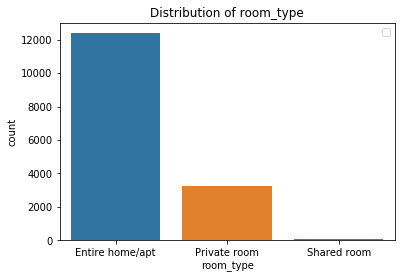

No handles with labels found to put in legend.
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26031 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backends\backend_a

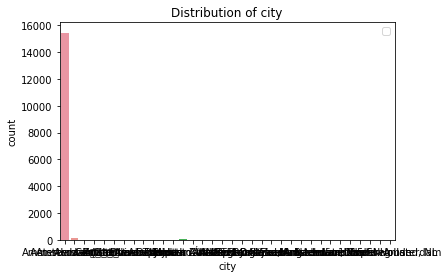

No handles with labels found to put in legend.


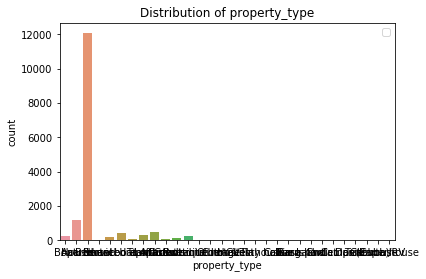

No handles with labels found to put in legend.


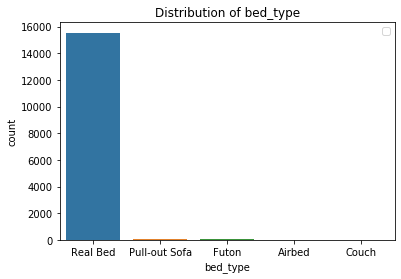

No handles with labels found to put in legend.


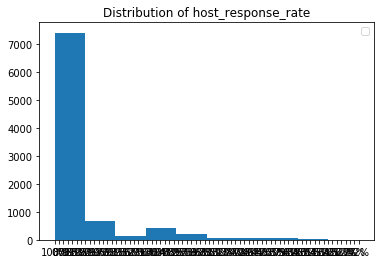

No handles with labels found to put in legend.


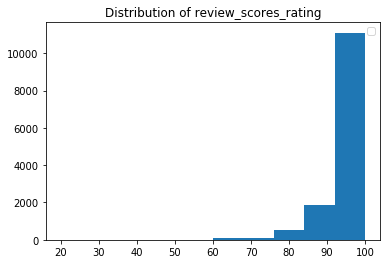

No handles with labels found to put in legend.


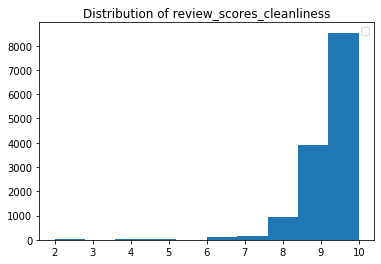

No handles with labels found to put in legend.


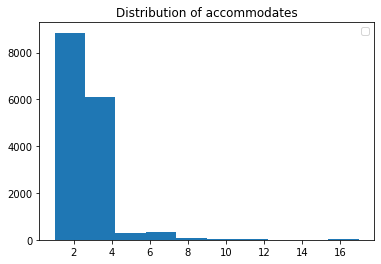

No handles with labels found to put in legend.


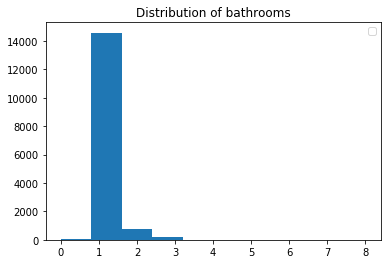

No handles with labels found to put in legend.


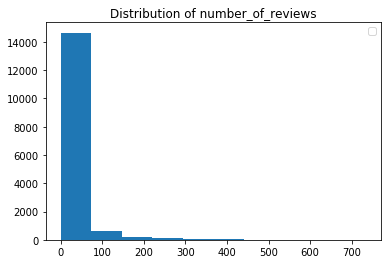

No handles with labels found to put in legend.


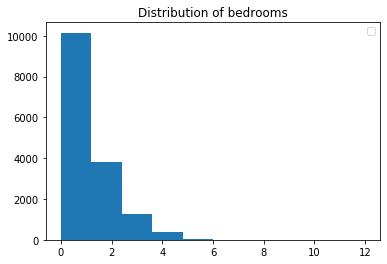

In [21]:


for col in categorical:
    ax = sns.countplot(x = col, data=X_train[X_train[col].notna()])
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    
for col in numerical:
    plt.hist(col,data=X_train[X_train[col].notna()])
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

    
    

Now lets look at the relationship between the variables  
First we'll look at the numerical variables

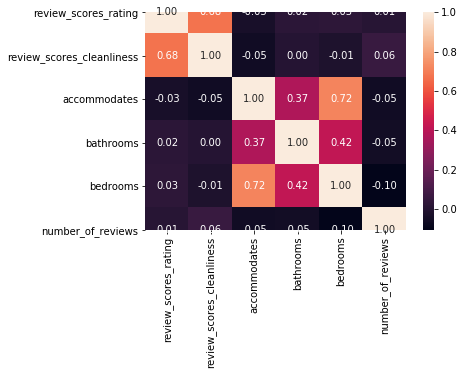

In [22]:
ax = sns.heatmap(X_train.corr(), annot=True, fmt=".2f",  square = True)



Relationship between all numerical variables including target

In [23]:
sns.pairplot(X_train[['review_scores_rating','review_scores_cleanliness', 'accommodates','bathrooms'\
                 ,'number_of_reviews','bedrooms','price']].dropna(), height=2.5);


KeyError: "['price'] not in index"

QUESTION 7

host_response_rate had 2 many null values, so its not useful.  
we'll drop it  
  
  
city, bed_type,bathrooms, number_of_reviews have only 1 value with a lot of data, and the rest barely appears on the dataset, so we'll drop those also  

review_score_cleanness will be removed since it has a very high correlation with review_scores_rating (makes sense that people wont give a good rating to something not clean)


In [ ]:
df.drop(columns = ['host_response_rate','city','bed_type','bathrooms','number_of_reviews','review_scores_cleanliness'],inplace=True)
X_train.drop(columns = ['host_response_rate','city','bed_type','bathrooms','number_of_reviews','review_scores_cleanliness'],inplace=True)
X_test.drop(columns = ['host_response_rate','city','bed_type','bathrooms','number_of_reviews','review_scores_cleanliness'],inplace=True)

In [ ]:
df.head()

## Part II:
   
**On your train set alone**
 
 1. Transform your categorical features - explain what your considerations were in ragards to which method you chose.
 2. What is the data shape after the transformation? 
 3. Look at the distribution of all the new features that were added / transformed by you - What can we say about it? Can you spot any redundant features (features with very low cardinality or super un-even distribution, long tail)? Show it.
 4. Take care of the redundant features you mentioned in previous question, and explain your steps.
 
**On your test set**
 5. Transform the categorical features in the test set, according to the train set. Make sure the test set now has no more and  no less features than the train set, and that they match in name.

Question 1  
Since room_type is a nominal categorical feature, since there's no especific order in hope or private room or shared room, i choose the one-hot-encoding method, since it's the most common to deal with this.

In [ ]:
X_train = pd.get_dummies(X_train,columns = ['room_type']).drop(columns =['room_type_Shared room'])
# didint do drop_first =True because it dropped the column with most "1"


In [ ]:
X_train = pd.get_dummies(X_train,columns = ['property_type'],drop_first=True)


In [ ]:
X_train

Question 2

In [ ]:
print(f'the shape is {X_train.shape}')

Question 3

DISPLAYING ALL THE DISTRIBUTIONS

In [ ]:
for col in (set(X_train.columns)-set(X_test.columns)):
    ax = sns.countplot(x = col, data=X_train[X_train[col].notna()])
    plt.show()

As we see are many new features created from property_type that are almost all the data just zeros 0.  
That wont add much information so i'll drop the following columns:  
['property_type_Barn',
 'property_type_Bed and breakfast',
 'property_type_Boat',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Campsite',
 'property_type_Casa particular (Cuba)',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Cottage',
 'property_type_Dome house',
 'property_type_Earth house',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_Hotel',
 'property_type_Houseboat',
 'property_type_Island',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Serviced apartment',
 'property_type_Tent',
 'property_type_Tiny house',
 'property_type_Townhouse',
 'property_type_Villa']  
   
     
   
 In order to do that i'll do a for loop to drop each column besides property...apartment and house, because does could be relevant
 



In [24]:
to_drop = []
for col in X_train.columns:
    #print(col)
    if 'property' in col:
    
        if (('Apartment' not in col) and ('House' not in col)):
            to_drop.append(col)
        elif ('boat'  in col):
            to_drop.append(col)
        
        
for col in to_drop:
    X_train.drop(columns=[col],inplace=True)

            

In [25]:
X_train

,city,review_scores_rating,review_scores_cleanliness,room_type,accommodates,bathrooms,bedrooms,number_of_reviews,bed_type,host_response_rate
4108,Amsterdam,97.0,10.0,Entire home/apt,4,1.0,2.0,61,Real Bed,100%
2113,Amsterdam,100.0,10.0,Entire home/apt,5,2.5,3.0,2,Real Bed,100%
8533,Amsterdam,85.0,9.0,Entire home/apt,4,1.5,2.0,11,Real Bed,100%
11234,Amsterdam,91.0,9.0,Entire home/apt,4,1.5,1.0,23,Real Bed,0%
18776,Amsterdam,90.0,7.0,Entire home/apt,3,1.0,1.0,3,Real Bed,100%
...,...,...,...,...,...,...,...,...,...,...
7832,Amsterdam,99.0,10.0,Private room,1,1.0,1.0,18,Real Bed,100%
9509,Amsterdam,99.0,10.0,Entire home/apt,4,1.0,1.0,55,Real Bed,100%
18667,Amsterdam,100.0,10.0,Entire home/apt,2,1.0,1.0,3,Real Bed,100%
8799,Amsterdam-Zuidoost,98.0,10.0,Entire home/apt,3,1.5,1.0,27,Real Bed,NaN


Question 5

In [26]:
X_test.shape

(3924, 11)

In [32]:
X_test = pd.get_dummies(X_test,columns = ['room_type']).drop(columns =['room_type_Shared room'])
X_test = pd.get_dummies(X_test,columns = ['property_type'],drop_first=True)


        
        




In [33]:
X_test

,review_scores_rating,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,...,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa
14193,100.0,2,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14561,100.0,3,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18956,93.0,4,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,97.0,2,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15008,96.0,2,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,96.0,2,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10697,98.0,2,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15793,100.0,2,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
569,96.0,2,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
to_drop = []
for col in X_test.columns:
    #print(col)
    if 'property' in col:
    
        if (('Apartment' not in col) and ('House' not in col)):
            to_drop.append(col)
        elif ('boat'  in col):
            to_drop.append(col)
print(to_drop)       
        
for col in to_drop:
    X_test = X_test.drop(columns=[col])

            

['property_type_Bed and breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Campsite', 'property_type_Casa particular (Cuba)', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_Hotel', 'property_type_Houseboat', 'property_type_Loft', 'property_type_Nature lodge', 'property_type_Other', 'property_type_Serviced apartment', 'property_type_Tiny house', 'property_type_Townhouse', 'property_type_Villa']


In [35]:
X_test.columns == X_train.columns


array([ True,  True,  True,  True,  True,  True,  True])

## Part III:

**On your train set alone**

 1. Transform your numerical features according to the 3 methods: normalization, binning and transformations (choose different features for each method)
 2. Explain the logic behind your choice
 3. Plot the new distributions to check that your transformation worked
 
**On your test set**
 4. Transform the numerical features in the test set, according to the train set. 

In [36]:
# your code here
X_train

,review_scores_rating,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_House
4108,97.0,4,2.0,1,0,0,0
2113,100.0,5,3.0,1,0,0,1
8533,85.0,4,2.0,1,0,1,0
11234,91.0,4,1.0,1,0,1,0
18776,90.0,3,1.0,1,0,1,0
...,...,...,...,...,...,...,...
7832,99.0,1,1.0,0,1,1,0
9509,99.0,4,1.0,1,0,1,0
18667,100.0,2,1.0,1,0,1,0
8799,98.0,3,1.0,1,0,1,0


Question 1

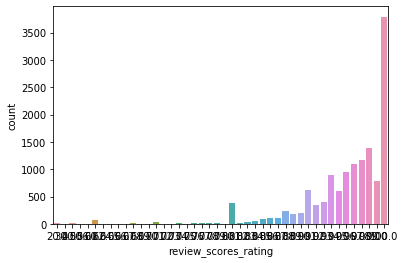

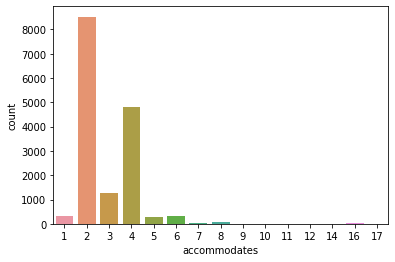

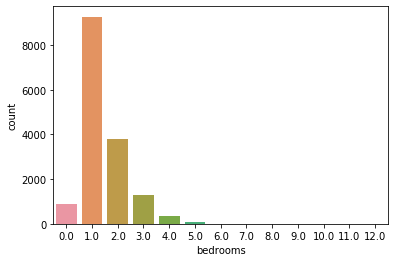

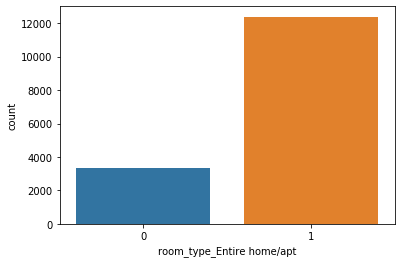

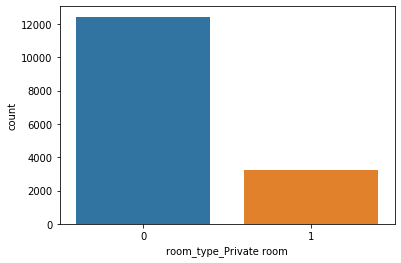

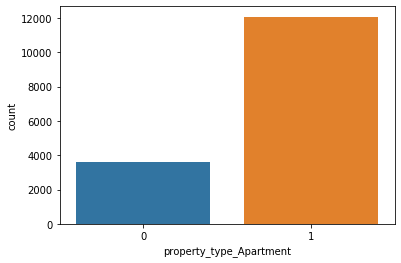

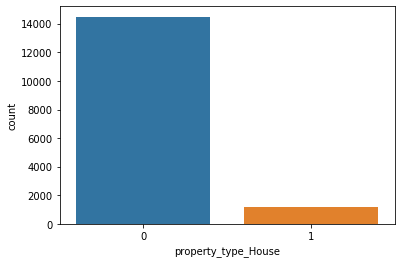

In [37]:
for col in X_train.columns:
    ax = sns.countplot(x = col, data=X_train[X_train[col].notna()])
    plt.show()

First of all we'll do binning
We'll do this with feature review_scores_rating  
First of all i have to deal with the nans it has

In [38]:
X_train['review_scores_rating'] = X_train['review_scores_rating'].fillna(X_train['review_scores_rating'].mean())

C:\Users\Daniel\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


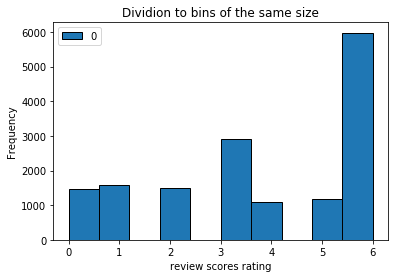

In [39]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

est.fit(X_train[['review_scores_rating']])

pd.DataFrame(est.transform(X_train[['review_scores_rating']])).plot(kind = 'hist', \
                                                            edgecolor = 'black');
plt.title('Dividion to bins of the same size')
plt.xlabel('review scores rating')
plt.show()

X_train['review_scores_rating'] =est.transform(X_train[['review_scores_rating']])

Now we'll use the method of transformation. We'll do it for the feature bedrooms that has a skewed distribution  
First of all i'll have to fill nans

In [40]:
X_train['bedrooms'] = X_train['bedrooms'].fillna(X_train['bedrooms'].median())

In [41]:
set(X_train['bedrooms'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}

In [42]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X_train['bedrooms'] = transformer.transform(X_train[['bedrooms']])
X_train

,review_scores_rating,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_House
4108,5.0,4,1.098612,1,0,0,0
2113,6.0,5,1.386294,1,0,0,1
8533,0.0,4,1.098612,1,0,1,0
11234,1.0,4,0.693147,1,0,1,0
18776,1.0,3,0.693147,1,0,1,0
...,...,...,...,...,...,...,...
7832,6.0,1,0.693147,0,1,1,0
9509,6.0,4,0.693147,1,0,1,0
18667,6.0,2,0.693147,1,0,1,0
8799,6.0,3,0.693147,1,0,1,0


Now we'll use normalization for all

In [43]:
type(X_train)

pandas.core.frame.DataFrame

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaler.fit(X_train._get_numeric_data())
X_train2 = scaler.transform(X_train._get_numeric_data())


X_train = pd.DataFrame(data=X_train2, columns=X_train._get_numeric_data().columns)

In [45]:
X_train

,review_scores_rating,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_House
0,0.571721,0.846052,0.776740,0.517268,-0.511721,-1.824080,-0.289282
1,1.042161,1.604623,1.629877,0.517268,-0.511721,-1.824080,3.456829
2,-1.780477,0.846052,0.776740,0.517268,-0.511721,0.548222,-0.289282
3,-1.310037,0.846052,-0.425688,0.517268,-0.511721,0.548222,-0.289282
4,-1.310037,0.087481,-0.425688,0.517268,-0.511721,0.548222,-0.289282
...,...,...,...,...,...,...,...
15690,1.042161,-1.429661,-0.425688,-1.933235,1.954188,0.548222,-0.289282
15691,1.042161,0.846052,-0.425688,0.517268,-0.511721,0.548222,-0.289282
15692,1.042161,-0.671090,-0.425688,0.517268,-0.511721,0.548222,-0.289282
15693,1.042161,0.087481,-0.425688,0.517268,-0.511721,0.548222,-0.289282


Now we'll plot the different features

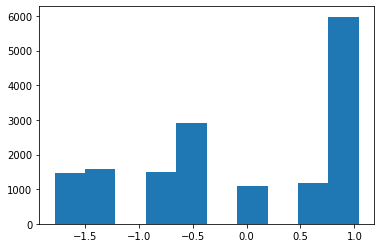

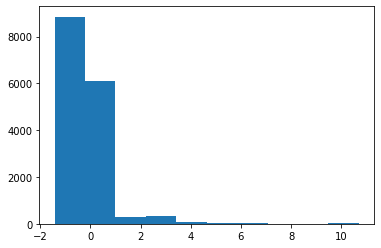

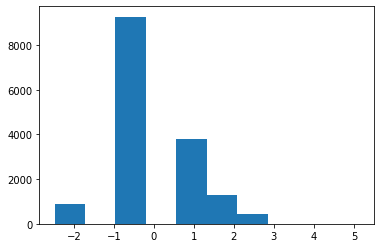

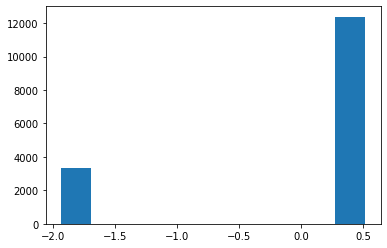

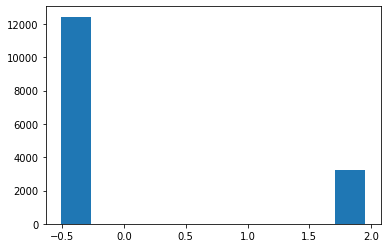

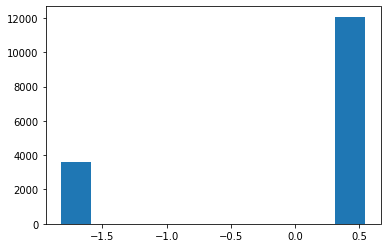

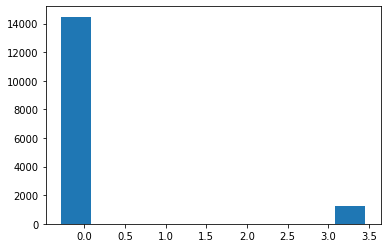

In [46]:
for col in X_train.columns:
    plt.hist(col,data=X_train[X_train[col].notna()])
    plt.show()

Question 4  

First of all i have to fill nan

In [50]:
X_test['review_scores_rating'] = X_test['review_scores_rating'].fillna(X_train['review_scores_rating'].mean())
X_test['bedrooms'] = X_test['bedrooms'].fillna(X_train['bedrooms'].median())

Now we'll use the previous transformations to change this data

In [51]:
#using the fit transformation from review_scores_rating
X_test['review_scores_rating'] =est.transform(X_test[['review_scores_rating']])

In [52]:
X_test['bedrooms'] = transformer.transform(X_test[['bedrooms']])


In [53]:
X_test2 = scaler.transform(X_test._get_numeric_data())


X_test = pd.DataFrame(data=X_test2, columns=X_test._get_numeric_data().columns)

And now we have the test transformed according to what we did with the training set

In [54]:
X_test

,review_scores_rating,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,property_type_Apartment,property_type_House
0,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,0.548222,-0.289282
1,-1.780477,0.087481,0.776740,0.517268,-0.511721,0.548222,-0.289282
2,-1.780477,0.846052,0.776740,0.517268,-0.511721,0.548222,-0.289282
3,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,0.548222,-0.289282
4,-1.780477,-0.671090,-0.425688,-1.933235,1.954188,0.548222,-0.289282
...,...,...,...,...,...,...,...
3919,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,0.548222,-0.289282
3920,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,-1.824080,-0.289282
3921,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,-1.824080,3.456829
3922,-1.780477,-0.671090,-0.425688,0.517268,-0.511721,0.548222,-0.289282


<div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>